# Recommender Project

## 1. Data Prep

In [1]:
# import the restaurant ratings data (first tab of spreadsheet)
import pandas as pd
df = pd.read_excel("../Data/Restaurant_Ratings.xlsx")
df.head()

,Consumer_ID,Restaurant_ID,Restaurant_Name,Overall_Rating
0,U1077,135085,Tortas Locas Hipocampo,2
1,U1077,135038,Restaurant La Chalita,2
2,U1077,132825,Puesto De Tacos,2
3,U1077,135060,Restaurante Marisco Sam,1
4,U1068,135104,Vips,1


In [6]:
# view the range of the ratings
df.describe()

,Restaurant_ID,Overall_Rating
count,1161.000000,1161.000000
mean,134192.041344,1.199828
std,1100.916275,0.773282
min,132560.000000,0.000000
25%,132856.000000,1.000000
50%,135030.000000,1.000000
75%,135059.000000,2.000000
max,135109.000000,2.000000


In [8]:
# pivot the data to get it into a user-item matrix format (think about how you'd like to deal with the NaN values)
restrnt_rating_pivot =df.pivot(index='Consumer_ID',columns='Restaurant_Name', values='Overall_Rating').fillna(df['Overall_Rating'].mean())
restrnt_rating_pivot.head()

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
Consumer_ID,,,,,,,,,,,,,,,,,,,,,
U1001,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,...,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,0.000000,1.199828,1.199828,1.199828
U1002,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,...,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.000000,1.199828,1.199828,1.199828
U1003,1.199828,1.199828,2.000000,1.199828,1.199828,2.000000,1.199828,1.199828,1.199828,1.199828,...,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828
U1004,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,2.000000,1.199828,1.199828,...,1.199828,1.199828,1.199828,2.000000,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828
U1005,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,2.000000,1.199828,1.199828,...,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828


In [9]:
# check the number of rows and columns in the data
restrnt_rating_pivot.shape

(138, 127)

## 2. Collaborative Filtering: Recommend Restaurants to a New User

### a. Fit an initial TruncatedSVD model with all the components on centered data

In [10]:
# center the data
data_centered= restrnt_rating_pivot-restrnt_rating_pivot.mean()
data_centered.head()

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
Consumer_ID,,,,,,,,,,,,,,,,,,,,,
U1001,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.004313,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-1.234655,0.021733,0.034765,0.02026
U1002,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.004313,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-0.234655,0.021733,0.034765,0.02026
U1003,0.060855,0.004344,0.775518,0.013038,0.02172,0.772629,0.008688,0.004313,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-0.034828,0.021733,0.034765,0.02026
U1004,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.804485,-0.011603,0.001442,...,0.021733,0.005792,0.004344,0.779875,0.033323,-0.002902,-0.034828,0.021733,0.034765,0.02026
U1005,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.804485,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-0.034828,0.021733,0.034765,0.02026


In [11]:
# fit a TruncatedSVD model with 127 components
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components= 127)
svd.fit(restrnt_rating_pivot)

TruncatedSVD(n_components=127)

In [18]:
# view the cumulative explained variance ratios
import numpy as np
cumsum_EVR=np.cumsum(svd.explained_variance_ratio_)
cumsum_EVR

array([0.03735912, 0.11500107, 0.16263374, 0.20033253, 0.23495204,
       0.26613788, 0.29622547, 0.32269822, 0.34820904, 0.37339671,
       0.39732235, 0.42078992, 0.44257416, 0.46215334, 0.48150016,
       0.50017594, 0.51831759, 0.5358638 , 0.55301104, 0.56959659,
       0.58509063, 0.60000937, 0.61423536, 0.62788961, 0.64092906,
       0.6537077 , 0.66600802, 0.67787963, 0.68939384, 0.70065786,
       0.7115761 , 0.72221488, 0.73245955, 0.74238326, 0.75195739,
       0.76147538, 0.77090941, 0.78009033, 0.788738  , 0.79689509,
       0.80464507, 0.81218818, 0.81952672, 0.82654585, 0.83325507,
       0.83988428, 0.84649941, 0.85276272, 0.85883172, 0.86470796,
       0.8704619 , 0.87603413, 0.88131257, 0.88645198, 0.89138388,
       0.89624911, 0.90097872, 0.90556637, 0.91002902, 0.91419859,
       0.91826302, 0.92202666, 0.92576266, 0.92940036, 0.93286355,
       0.9362056 , 0.93949944, 0.94262992, 0.94567884, 0.94860385,
       0.95146646, 0.95412922, 0.95669232, 0.95919643, 0.96154

In [21]:
xf=pd.DataFrame(cumsum_EVR, index=range(1,128), columns=['cumsum'])
xf.head()

,cumsum
1,0.037359
2,0.115001
3,0.162634
4,0.200333
5,0.234952


''

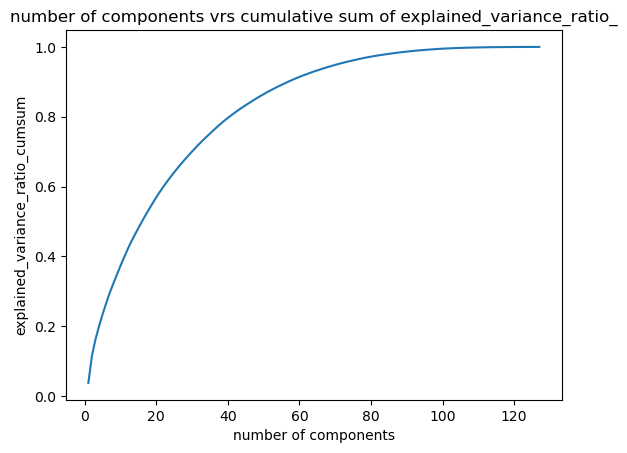

In [20]:
# plot the cumulative explained variance ratios

import matplotlib.pyplot as plt

xf.plot(kind='line',
      xlabel='number of components',
      ylabel='explained_variance_ratio_cumsum',
      title='number of components vrs cumulative sum of explained_variance_ratio_', legend=False)
;

### b. Update the model to have 50 components

In [29]:
# fit a TruncatedSVD model with 50 components
svd50 = TruncatedSVD(n_components= 50)
svd50.fit(restrnt_rating_pivot)

TruncatedSVD(n_components=50)

In [24]:
# view the cumulative explained variance ratios
cumsum_EVR50=np.cumsum(svd50.explained_variance_ratio_)
cumsum_EVR50

array([0.03735912, 0.11500107, 0.16263374, 0.20033253, 0.23495204,
       0.26613788, 0.29622547, 0.32269822, 0.34820904, 0.37339671,
       0.39732235, 0.42078992, 0.44257416, 0.46215334, 0.48150016,
       0.50017594, 0.51831759, 0.5358638 , 0.55301103, 0.56959659,
       0.58509062, 0.60000937, 0.61423535, 0.62788959, 0.64092903,
       0.65370765, 0.66600796, 0.67787952, 0.68939369, 0.70065767,
       0.71157587, 0.72221456, 0.73245891, 0.74238252, 0.7519565 ,
       0.76147441, 0.77090797, 0.7800887 , 0.78873554, 0.79689211,
       0.80464081, 0.81218076, 0.81950754, 0.82650904, 0.83321236,
       0.83983778, 0.8464491 , 0.85270076, 0.85871217, 0.864546  ])

In [32]:
sum(svd50.explained_variance_ratio_).round(2)

0.86

### c. Introduce a New User

In [25]:
# here's a new user
import numpy as np
import pandas as pd

# create a user-item matrix
restaurant_ratings = pd.read_excel('../Data/Restaurant_Ratings.xlsx')
X = restaurant_ratings.pivot(index='Consumer_ID', columns='Restaurant_Name', values='Overall_Rating').fillna(restaurant_ratings.Overall_Rating.mean())

# create a vector of NaN values
vector_length = X.shape[1]
new_user = np.full(vector_length, np.NaN)

# populate with 2 ratings
ratings = [2, 2]
positions_to_populate = [40, 60]
new_user[positions_to_populate] = ratings

# view as a DataFrame
new_user_df = pd.DataFrame([new_user], columns=X.columns)
new_user_df

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# view only the restaurants that the new user rated
already_rated=new_user_df.T.dropna()
already_rated

,0
Restaurant_Name,
KFC,2.0
McDonalds Centro,2.0


In [27]:
# read in the restaurants details (second tab of spreadsheet)
restaurant_details = pd.read_excel('../Data/restaurant_ratings.xlsx', sheet_name=1)
restaurant_details.head()

,Restaurant_ID,Name,Cuisine,Price,Franchise
0,135069.0,Abondance Restaurante Bar,Bar,Low,No
1,135016.0,Arrachela Grill,NaN,Medium,No
2,132754.0,Cabana Huasteca,Mexican,Medium,No
3,132561.0,Cafe Ambar,NaN,Low,No
4,132572.0,Cafe Chaires,Cafeteria,Low,No


In [28]:
# the new user likes low-priced american chain restaurants
restaurant_details[restaurant_details.Name.isin(new_user_df.T.dropna().index)]

,Restaurant_ID,Name,Cuisine,Price,Franchise
40,132851.0,KFC,American,Low,Yes
60,132583.0,McDonalds Centro,American,Low,Yes


### d. Recommend Restaurants to the New User

In [36]:
# apply the necessary data prep steps to the user

# fill nan values with the mean rating
new_user_d=new_user_df.fillna(restaurant_ratings.Overall_Rating.mean())
new_user_d
# center the data
centered_new_data= new_user_d-X.mean()
centered_new_data

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
0,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.004313,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-0.034828,0.021733,0.034765,0.02026


In [39]:
# transform the user into the latent space
new_user_50d=svd50.transform(centered_new_data)
new_user_50d

array([[ 0.13892487,  0.10151095,  0.01014414, -0.06949019, -0.01476658,
         0.04352446, -0.02582357, -0.03537184, -0.01936645, -0.08907735,
        -0.15647837,  0.0312512 ,  0.08006105,  0.07311951, -0.00170052,
        -0.09289856, -0.00925767,  0.06127154,  0.12346288, -0.00566921,
         0.15089007,  0.07538275,  0.06790352,  0.0434122 , -0.17548148,
        -0.03403215, -0.00950247,  0.00119874, -0.09579869, -0.07058377,
        -0.07083656,  0.00426319,  0.09899761, -0.02348988,  0.09237995,
        -0.10134088, -0.11485773,  0.03560766, -0.04962831,  0.01795027,
        -0.02846251, -0.07487116,  0.01481622,  0.01685584,  0.04472854,
         0.01330526,  0.04206022,  0.02621288,  0.01402036,  0.04471138]])

In [40]:
# view the shape of the output
new_user_50d.shape

(1, 50)

In [41]:
# reconstruct the user-item matrix for the user
VT50=svd50.components_
VT50

array([[ 0.08428459,  0.08833107,  0.09064448, ...,  0.08705645,
         0.08625623,  0.08741922],
       [ 0.06729274,  0.04298925, -0.04254651, ...,  0.04455263,
        -0.12344778, -0.05913283],
       [-0.02594423, -0.01736269,  0.17598159, ..., -0.01811103,
        -0.19359512,  0.27347047],
       ...,
       [ 0.12441719,  0.02189617,  0.17276326, ...,  0.0335428 ,
         0.05253484, -0.03588765],
       [ 0.20877112, -0.17626184,  0.03284124, ..., -0.11238574,
        -0.02584728, -0.05950886],
       [ 0.15482799,  0.00555145,  0.06613583, ..., -0.0356451 ,
        -0.04014736,  0.06671539]])

In [42]:
# view the shape of the output
VT50.shape

(50, 127)

In [43]:
# make restaurant recommendations for the new user
new_user_recs=np.dot(new_user_50d,VT50)
new_user_recs

array([[ 0.02125114, -0.00478619, -0.03617464,  0.00937297,  0.05727641,
         0.01081922, -0.02594083, -0.01545739,  0.01494914,  0.02376282,
         0.01899975,  0.04056185,  0.023891  ,  0.02232859,  0.08184253,
         0.1386178 ,  0.02548668, -0.00498849,  0.00705179, -0.08784183,
        -0.0245245 ,  0.01695444,  0.00110117,  0.0114809 , -0.01310898,
         0.06204597,  0.00969512,  0.03451188,  0.0106325 , -0.02265704,
        -0.00740046, -0.01897611,  0.01420496,  0.00466728,  0.01975513,
         0.03440867,  0.02698448,  0.01548797,  0.0173675 ,  0.05697057,
         0.16332176,  0.0237678 ,  0.00051316,  0.00971071, -0.00928191,
        -0.0193969 , -0.10804469,  0.0118212 , -0.01093612,  0.00054109,
        -0.02720329, -0.01511384,  0.03695398,  0.01484447,  0.0031405 ,
         0.00168179,  0.03183924, -0.01508283, -0.04325635,  0.0963485 ,
         0.13431843,  0.0305579 ,  0.01887132,  0.02093672,  0.01803634,
        -0.00065901,  0.02179604,  0.02265027,  0.0

In [59]:
# sort the recommendations
new_user_recs_df=pd.DataFrame(new_user_recs,columns=X.columns)
new_user_recs_sort=new_user_recs_df.T.sort_values(by=0,ascending=False).head(10)
new_user_recs_sort.columns=['Recommendations']
new_user_recs_sort.reset_index(inplace=True)
new_user_recs_sort

,Restaurant_Name,Recommendations
0,KFC,0.163322
1,Chilis Cuernavaca,0.138618
2,Potzocalli,0.134662
3,McDonalds Centro,0.134318
4,Restaurant And Bar And Clothesline Carlos N Ch...,0.132101
5,Restaurant Teely,0.123526
6,Restaurante Y Pescaderia Tampico,0.120107
7,Mariscos Tia Licha,0.096349
8,Sirlone,0.085073
9,Chaires,0.081843


In [60]:
# exclude the restaurants the user already rated
already_rated2=already_rated.index

In [61]:
# view the new recommended restaurants
rec_restaurant=new_user_recs_sort[~new_user_recs_sort.Restaurant_Name.isin(already_rated2)]
rec_restaurant

,Restaurant_Name,Recommendations
1,Chilis Cuernavaca,0.138618
2,Potzocalli,0.134662
4,Restaurant And Bar And Clothesline Carlos N Ch...,0.132101
5,Restaurant Teely,0.123526
6,Restaurante Y Pescaderia Tampico,0.120107
7,Mariscos Tia Licha,0.096349
8,Sirlone,0.085073
9,Chaires,0.081843


In [62]:
# view the restaurant details dataframe
restaurant_details.head()

,Restaurant_ID,Name,Cuisine,Price,Franchise
0,135069.0,Abondance Restaurante Bar,Bar,Low,No
1,135016.0,Arrachela Grill,NaN,Medium,No
2,132754.0,Cabana Huasteca,Mexican,Medium,No
3,132561.0,Cafe Ambar,NaN,Low,No
4,132572.0,Cafe Chaires,Cafeteria,Low,No


In [63]:
# combine the predicted ratings and restaurant details dataframes
(rec_restaurant.merge(restaurant_details, how='left', left_on='Restaurant_Name', right_on='Name')
               .drop(columns='Name')
               .head(10))

,Restaurant_Name,Recommendations,Restaurant_ID,Cuisine,Price,Franchise
0,Chilis Cuernavaca,0.138618,134987.0,NaN,Medium,No
1,Potzocalli,0.134662,135108.0,NaN,Low,No
2,Restaurant And Bar And Clothesline Carlos N Ch...,0.132101,134983.0,Bar,High,No
3,Restaurant Teely,0.123526,134992.0,NaN,High,No
4,Restaurante Y Pescaderia Tampico,0.120107,135054.0,Seafood,High,No
5,Mariscos Tia Licha,0.096349,132768.0,Family,Medium,Yes
6,Sirlone,0.085073,132854.0,International,Medium,No
7,Chaires,0.081843,132866.0,Bakery,Medium,No


In [26]:
# what are your thoughts on these recommendations?


## 3. Content-Based Filtering: Suggest Similar Restaurants to a Restaurant

### a. Prep the data to contain only numeric values

In [65]:

restaurant_details.head()

# turn price into a numeric value

# turn franchise into an indicator


,Restaurant_ID,Name,Cuisine,Price,Franchise
0,135069.0,Abondance Restaurante Bar,Bar,Low,No
1,135016.0,Arrachela Grill,NaN,Medium,No
2,132754.0,Cabana Huasteca,Mexican,Medium,No
3,132561.0,Cafe Ambar,NaN,Low,No
4,132572.0,Cafe Chaires,Cafeteria,Low,No


In [66]:
# turn the cuisine, price and franchise columns of the restaurant details data into numeric columns
cuisine_num = pd.get_dummies(restaurant_details.Cuisine).astype(int)
price_num = pd.DataFrame(np.where(restaurant_details.Price == 'High', 1,
                         np.where(restaurant_details.Price == 'Medium', 0, -1)),
                         columns=['Price'])
franchise_num = pd.DataFrame(np.where(restaurant_details.Franchise == 'Yes', 1, 0), columns=['Franchise'])


In [67]:
# combine them into a single dataframe
restaurant_details_df = pd.concat([cuisine_num, price_num, franchise_num], axis=1).set_index(restaurant_details.Name)
restaurant_details_df.head()

,American,Armenian,Bakery,Bar,Breakfast,Brewery,Burgers,Cafeteria,Chinese,Coffee Shop,...,International,Italian,Japanese,Mexican,Pizzeria,Regional,Seafood,Vietnamese,Price,Franchise
Name,,,,,,,,,,,,,,,,,,,,,
Abondance Restaurante Bar,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,0
Arrachela Grill,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cabana Huasteca,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Cafe Ambar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,0
Cafe Chaires,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,-1,0


### b. Calculate the cosine similarities between rows

In [68]:
# calculate all the cosine similarities
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
np.set_printoptions(linewidth=np.inf) #to set the array in a line and prevent wrapping
cs=cosine_similarity(restaurant_details_df)
cs

array([[1.        , 0.        , 0.        , ..., 0.5       , 0.5       , 0.40824829],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        , 0.        ],
       ...,
       [0.5       , 0.        , 0.        , ..., 1.        , 0.5       , 0.40824829],
       [0.5       , 0.        , 0.        , ..., 0.5       , 1.        , 0.40824829],
       [0.40824829, 0.        , 0.        , ..., 0.40824829, 0.40824829, 1.        ]])

In [70]:
cs_df=pd.DataFrame(cs,index=restaurant_details_df.index, columns=restaurant_details_df.index)
cs_df.head()

Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
Name,,,,,,,,,,,,,,,,,,,,,
Abondance Restaurante Bar,1.000000,0.0,0.0,0.707107,0.500000,0.000000,0.500000,0.000000,0.0,0.000000,...,0.500000,0.500000,0.500000,0.408248,0.500000,0.0,0.0,0.500000,0.500000,0.408248
Arrachela Grill,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
Cabana Huasteca,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.707107,...,0.707107,0.707107,0.707107,0.000000,0.707107,0.0,0.0,0.000000,0.000000,0.000000
Cafe Ambar,0.707107,0.0,0.0,1.000000,0.707107,0.000000,0.707107,0.000000,0.0,0.000000,...,0.707107,0.707107,0.707107,0.577350,0.707107,0.0,0.0,0.707107,0.707107,0.577350
Cafe Chaires,0.500000,0.0,0.0,0.707107,1.000000,0.707107,1.000000,0.707107,0.0,0.000000,...,0.500000,0.500000,0.500000,0.408248,0.500000,0.0,0.0,0.500000,0.500000,0.408248


In [75]:
# find the most similar restuarants to KFC
kfc_recs=cs_df[['KFC']].sort_values(by='KFC',ascending=False)
kfc_recs

Name,KFC
Name,
Vips,1.000000
McDonalds Centro,1.000000
KFC,1.000000
Tacos Los Volcanes,1.000000
Sirloin Stockade,0.816497
...,...
Restaurante Guerra,-0.577350
Restaurante El Chivero S.A. De C.V.,-0.577350
Restaurante Casa De Las Flores,-0.577350


In [78]:
# find the details of those restaurants
(kfc_recs.merge(restaurant_details, how='left', left_on='Name', right_on='Name')
               .head(10))

,Name,KFC,Restaurant_ID,Cuisine,Price,Franchise
0,Vips,1.000000,132951.0,American,Low,Yes
1,McDonalds Centro,1.000000,132583.0,American,Low,Yes
2,KFC,1.000000,132851.0,American,Low,Yes
3,Tacos Los Volcanes,1.000000,132958.0,American,Low,Yes
4,Sirloin Stockade,0.816497,132877.0,NaN,Low,Yes
5,Dairy Queen,0.816497,132884.0,NaN,Low,Yes
6,Church's,0.816497,132564.0,NaN,Low,Yes
7,Emilianos,0.666667,132955.0,Brewery,Low,Yes
8,Subway,0.666667,135021.0,Fast Food,Low,Yes
9,Pollo Frito Buenos Aires,0.666667,132609.0,Fast Food,Low,Yes


#### what are your thoughts on these recommendations? 

The top 3 recommended restaurants share the same cuisine, price and franchise categories with KFC, so it is a good recommendataion


## 4. Summarize Recommendations

In [81]:
# For the user who likes KFC and McDonalds, what are your top 10 restaurant recommendations?
# find the details of those restaurants
(rec_restaurant.merge(restaurant_details, how='left', left_on='Restaurant_Name', right_on='Name').drop(columns='Name')
               .head(10))

,Restaurant_Name,Recommendations,Restaurant_ID,Cuisine,Price,Franchise
0,Chilis Cuernavaca,0.138618,134987.0,NaN,Medium,No
1,Potzocalli,0.134662,135108.0,NaN,Low,No
2,Restaurant And Bar And Clothesline Carlos N Ch...,0.132101,134983.0,Bar,High,No
3,Restaurant Teely,0.123526,134992.0,NaN,High,No
4,Restaurante Y Pescaderia Tampico,0.120107,135054.0,Seafood,High,No
5,Mariscos Tia Licha,0.096349,132768.0,Family,Medium,Yes
6,Sirlone,0.085073,132854.0,International,Medium,No
7,Chaires,0.081843,132866.0,Bakery,Medium,No


### What are your thoughts on these recommendations and how could you improve your recommendations?
Only few recommended restaurants shared similar fetures with KFC and McDonalds

In [82]:
# For the KFC details page, what are the top 10 other restuarants that you would suggest?
(kfc_recs.merge(restaurant_details, how='left', left_on='Name', right_on='Name')
               .head(10))

,Name,KFC,Restaurant_ID,Cuisine,Price,Franchise
0,Vips,1.000000,132951.0,American,Low,Yes
1,McDonalds Centro,1.000000,132583.0,American,Low,Yes
2,KFC,1.000000,132851.0,American,Low,Yes
3,Tacos Los Volcanes,1.000000,132958.0,American,Low,Yes
4,Sirloin Stockade,0.816497,132877.0,NaN,Low,Yes
5,Dairy Queen,0.816497,132884.0,NaN,Low,Yes
6,Church's,0.816497,132564.0,NaN,Low,Yes
7,Emilianos,0.666667,132955.0,Brewery,Low,Yes
8,Subway,0.666667,135021.0,Fast Food,Low,Yes
9,Pollo Frito Buenos Aires,0.666667,132609.0,Fast Food,Low,Yes


### What are your thoughts on these suggestions and how could you improve your suggestions?
The top 10 recommended restaurants share the same price and franchise categories with KFC, so it is a good recommendataion